<a href="https://colab.research.google.com/github/yagvendrasingh/Deep-fake-image-classifier/blob/master/final_model_bert_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive)

Mounted at /gdrive
[Errno 2] No such file or directory: '/gdrive)'
/content


In [ ]:
!pip install transformers==2.11.0

     |████████████████████████████████| 675kB 4.7MB/s 
     |████████████████████████████████| 3.8MB 24.6MB/s 
     |████████████████████████████████| 890kB 50.4MB/s 
     |████████████████████████████████| 1.1MB 58.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=b4b83ef9651c40f66eddc7e4eacb3fd296cc78bba4077d9c23b4483c32891b25
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


# Project 2nd : Toxic comment classsification

## Problem statement:

In the world full of internet everybody has liberty to write and give their opinion at any social medial platform. people usually choose to write their opinion on website"s comment section and thread section but many times it has observed that rather than giving constructive advise people use this opportunity to bully or abuse others and start fighting with each other in the threads and comment section where they sometimes even give threat and insult each other .To specifically identify and restrict these type of comments internet companies are working very hardly and this competition was also held on similar topic.

## The resources used in this project

1.) https://arxiv.org/pdf/1810.04805.pdf

2.) https://huggingface.co/transformers/model_doc/bert.html

### 1.) Importing all the important libraries

In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 4.0MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 921kB 14.7MB/s 
     |████████████████████████████████| 61kB 8.8MB/s 
     |████████████████████████████████| 71kB 11.0MB/s 
     |████████████████████████████████| 102kB 12.8MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=91d0b03e12e81766f5d9196b3c2ec2ac7f3a7e132dd72d3890a1adbbc2d51603
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=0b50d82ee647f358ccdd350d9e3dd833350400ad30e07779875078f8146d6b8c
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
#from keras.layers import Dense, Input, Conv2D, Flatten, MaxPooling2D, Activation, Dropout, Average , BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tqdm import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
#from transformers import BertTokenizer, TFBertModel , TFBertForSequenceClassification
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
import os
#from googletrans import *
from wordcloud import WordCloud , STOPWORDS 

In [ ]:
data = pd.read_csv("/gdrive/My Drive/Colab Notebooks/jigsaw-toxic-comment-classification-challenge/train.csv")
data.head()

id  ... identity_hate
0  0000997932d777bf  ...             0
1  000103f0d9cfb60f  ...             0
2  000113f07ec002fd  ...             0
3  0001b41b1c6bb37e  ...             0
4  0001d958c54c6e35  ...             0

[5 rows x 8 columns]

In [ ]:
test_data =  pd.read_csv("/gdrive/My Drive/Colab Notebooks/jigsaw-toxic-comment-classification-challenge/test.csv")
test_data.head()

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [ ]:
test_labels = pd.read_csv("/gdrive/My Drive/Colab Notebooks/jigsaw-toxic-comment-classification-challenge/test_labels.csv")
test_labels.head()

id  toxic  severe_toxic  ...  threat  insult  identity_hate
0  00001cee341fdb12     -1            -1  ...      -1      -1             -1
1  0000247867823ef7     -1            -1  ...      -1      -1             -1
2  00013b17ad220c46     -1            -1  ...      -1      -1             -1
3  00017563c3f7919a     -1            -1  ...      -1      -1             -1
4  00017695ad8997eb     -1            -1  ...      -1      -1             -1

[5 rows x 7 columns]

In [ ]:
test_data = test_data.merge(  test_labels ,  how='right')
test_data_new = test_data[test_data["toxic"]!= -1].reset_index(drop=True)
test_data_new.head()

id  ... identity_hate
0  0001ea8717f6de06  ...             0
1  000247e83dcc1211  ...             0
2  0002f87b16116a7f  ...             0
3  0003e1cccfd5a40a  ...             0
4  00059ace3e3e9a53  ...             0

[5 rows x 8 columns]

In [ ]:
print("comment_text null value   =",sum(pd.isnull(data['comment_text'])))
print("toxic comment null values =" ,sum(pd.isnull(data['toxic'])))
print("sever toxic null values   =" , sum(pd.isnull(data['severe_toxic'])))
print("obscene null values       =" , sum(pd.isnull(data['obscene'])))
print("threat null values        =" ,sum(pd.isnull(data['threat'])))
print("insult null values        =" ,sum(pd.isnull(data['insult'])))
print("identity null values      ="  ,sum(pd.isnull(data['identity_hate'])))

comment_text null value   = 0
toxic comment null values = 0
sever toxic null values   = 0
obscene null values       = 0
threat null values        = 0
insult null values        = 0
identity null values      = 0


In [ ]:
print("comment_text null value   =",sum(pd.isnull(test_data_new['comment_text'])))
print("toxic comment null values =" ,sum(pd.isnull(test_data_new['toxic'])))
print("sever toxic null values   =" , sum(pd.isnull(test_data_new['severe_toxic'])))
print("obscene null values       =" , sum(pd.isnull(test_data_new['obscene'])))
print("threat null values        =" ,sum(pd.isnull(test_data_new['threat'])))
print("insult null values        =" ,sum(pd.isnull(test_data_new['insult'])))
print("identity null values      ="  ,sum(pd.isnull(test_data_new['identity_hate'])))

comment_text null value   = 0
toxic comment null values = 0
sever toxic null values   = 0
obscene null values       = 0
threat null values        = 0
insult null values        = 0
identity null values      = 0


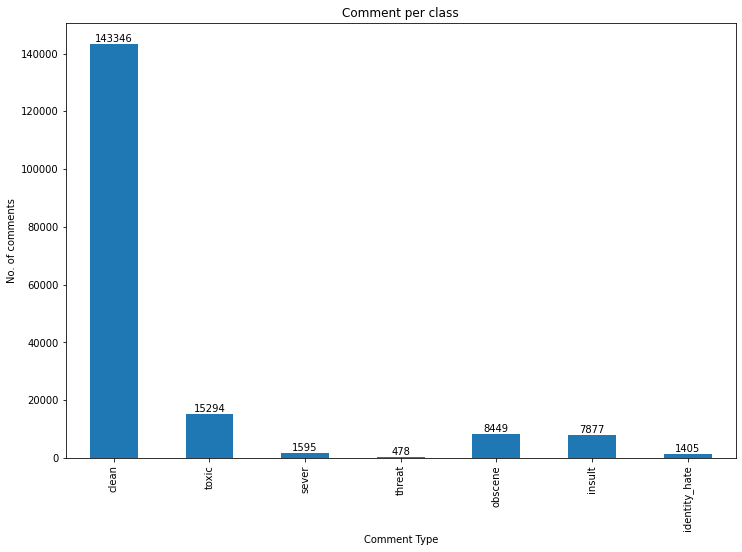

In [ ]:
#https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart

clean = len(data[(data["toxic"]==0) & (data["severe_toxic"]==0) & (data["obscene"]==0) & (data["threat"]==0) &(data["insult"]==0) & (data["identity_hate"]==0)]) 
toxic = len(data[data["toxic"]==1])
sever =  len(data[data["severe_toxic"]==1])
threat = len(data[data["threat"]==1]) 
obscene = len(data[data["obscene"]==1])
insult = len(data[data["insult"]==1])
identity_hate = len(data[data["identity_hate"]==1])
fr = [clean , toxic , sever , threat ,obscene , insult , identity_hate]

freq_series = pd.Series(fr)
x_labels = ["clean" , "toxic" , "sever" , "threat" ,"obscene" , "insult" , "identity_hate"]
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title('Comment per class')
ax.set_xlabel("Comment Type")
ax.set_ylabel('No. of comments')
ax.set_xticklabels(x_labels)
rects = ax.patches


for rect , label in zip(rects , fr):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

plt.show()

### observation:
    
   1.) The data is highly imbalanced in nature and some of the points are very less like threat and identity hate.

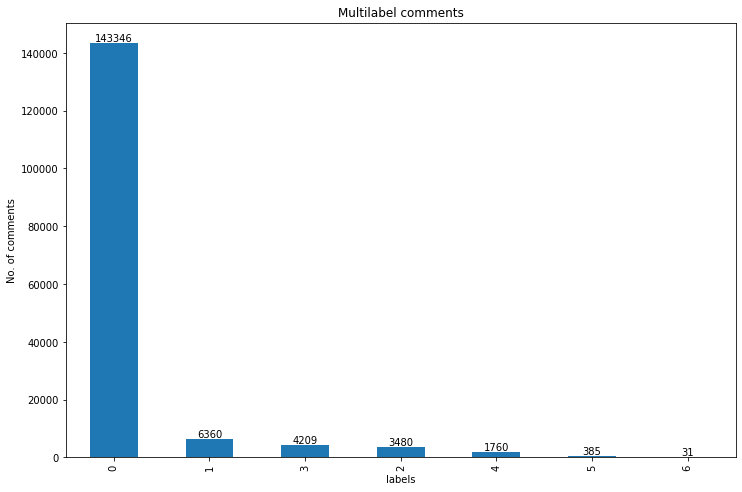

In [ ]:
x = data[["toxic" , "severe_toxic"  ,"obscene" , "threat" , "insult" , "identity_hate"]].sum(axis = 1).value_counts()#it written a dictionary
key = x.keys()
value = x.values

fr = pd.Series(value)
plt.figure(figsize=(12, 8))
ax = fr.plot(kind='bar')
ax.set_title('Multilabel comments')
ax.set_xlabel("labels")
ax.set_ylabel('No. of comments')
ax.set_xticklabels(key)
rects = ax.patches


for rect , label in zip(rects , fr):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

plt.show()

### Observation:

  1.) Most of the labels are sigle labeled in the data set.
  
  2.) Only 31 points are there which has all the three labesl.
   

In [ ]:
data['total_length'] = data['comment_text'].apply(len)

data['uppercase'] = data['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))

data['exclamation_punctuation'] = data['comment_text'].apply(lambda comment: comment.count('!'))

data['num_punctuation'] = data['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '.,;:?'))

data['num_symbols'] = data['comment_text'].apply(lambda comment: sum(comment.count(w) for w in '*&$%'))

data['num_words'] = data['comment_text'].apply(lambda comment: len(comment.split()))

data['num_happy_smilies'] =data['comment_text'].apply(lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

data['num_sad_smilies'] = data['comment_text'].apply(lambda comment: sum(comment.count(w) for w in (':-(', ':(', ';-(', ';(')))


In [ ]:
data.head(5)

id  ... num_sad_smilies
0  0000997932d777bf  ...               0
1  000103f0d9cfb60f  ...               0
2  000113f07ec002fd  ...               0
3  0001b41b1c6bb37e  ...               0
4  0001d958c54c6e35  ...               0

[5 rows x 16 columns]

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Histogram(x=data.loc[data['toxic'] == 1].total_length, name='toxic'))
fig.add_trace(go.Histogram(x=data.loc[data['severe_toxic'] == 1].total_length, name='severe_toxic'))
fig.add_trace(go.Histogram(x=data.loc[data['obscene'] == 1].total_length, name='obscene'))
fig.add_trace(go.Histogram(x=data.loc[data['threat'] == 1].total_length, name='threat'))
fig.add_trace(go.Histogram(x=data.loc[data['insult'] == 1].total_length, name='insult'))
fig.add_trace(go.Histogram(x=data.loc[data['identity_hate'] == 1].total_length, name='identity hate'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.5)
fig.show()


In [ ]:
data['toxic_type'] = '' #Giving the empty space to the column

data['toxic_type'].loc[data['toxic'] == 1] += 'toxic ' 
#this will written a string as ['','toxic] at the place where the toxic==1

data['toxic_type'].loc[data['severe_toxic'] == 1] += 'severe_toxic '
#this will written a string as ['','toxic,sever_toxic] at the place where the sever_toxic==1

data['toxic_type'].loc[data['obscene'] == 1] += 'obscene '
#this will written a string as ['','toxic,sever_toxic,obscene] at the place where the obscene==1

data['toxic_type'].loc[data['threat'] == 1] += 'threat '
#this will written a string as ['','toxic,sever_toxic,obscene,threat] at the place where the sever_toxic==1

data['toxic_type'].loc[data['insult'] == 1] += 'insult '
#this will written a string as ['','toxic,sever_toxic,obscene,threat,insult] at the place where the sever_toxic==1

data['toxic_type'].loc[data['identity_hate'] == 1] += 'identity_hate ' 
#this will written a string as ['','toxic,sever_toxic,obscene,threat,inslut,identity_hate] at the place where the identity_hate==1

# counitng the total_toxic_type in each comment;
data['list_toxic_type'] = data['toxic_type'].apply(lambda row: row.split(' '))#splitting each string by space
data['list_toxic_type'] =data['list_toxic_type'].apply(lambda row: len(row)-1)#counting the number of cat. in each comment


data['list_toxic_type'].loc[data['list_toxic_type']==0] = 'normal comment'
data['list_toxic_type'].loc[data['list_toxic_type']==1] = 'has one type of toxic'
data['list_toxic_type'].loc[data['list_toxic_type']==2] = 'has two types of toxic'
data['list_toxic_type'].loc[data['list_toxic_type']==3] = 'has three types of toxic'
data['list_toxic_type'].loc[data['list_toxic_type']==4] = 'has four types of toxic'
data['list_toxic_type'].loc[data['list_toxic_type']==5] = 'has five types of toxic'
data['list_toxic_type'].loc[data['list_toxic_type']==6] = 'has six types of toxic'


In [ ]:
types = ['normal comment', 'has one type of toxic', 'has two types of toxic', 'has three types of toxic',
         'has four types of toxic', 'has five types of toxic', 'has six types of toxic']

columns = ['total_length', 'uppercase', 'exclamation_punctuation',
                                'num_punctuation', 'num_symbols', 'num_happy_smilies', 'num_sad_smilies']

df_mean = pd.DataFrame(columns=columns)
for i, toxic_type in enumerate(types):
    for col in columns:    
        df_mean.at[i, col] = data[col].loc[data['list_toxic_type'] == toxic_type].mean()
df_mean['toxic_types'] = types 
df_mean.head(7)

total_length uppercase  ... num_sad_smilies               toxic_types
0      404.347    14.237  ...     0.000369735            normal comment
1       348.79   32.9997  ...     0.000628931     has one type of toxic
2      252.164   26.9325  ...     0.000574713    has two types of toxic
3       241.64   36.5308  ...     0.000712758  has three types of toxic
4       371.54   106.407  ...      0.00340909   has four types of toxic
5      361.423   124.948  ...               0   has five types of toxic
6      488.871   149.065  ...               0    has six types of toxic

[7 rows x 8 columns]

In [ ]:
df_mean['total_length'] = pd.to_numeric(df_mean['total_length'])
df_mean['uppercase'] = pd.to_numeric(df_mean['uppercase'])
df_mean['exclamation_punctuation'] = pd.to_numeric(df_mean['exclamation_punctuation'])
df_mean['num_punctuation'] = pd.to_numeric(df_mean['num_punctuation'])
df_mean['num_symbols'] = pd.to_numeric(df_mean['num_symbols'])
df_mean['num_happy_smilies'] = pd.to_numeric(df_mean['num_happy_smilies'])
df_mean['num_sad_smilies'] = pd.to_numeric(df_mean['num_sad_smilies'])
df_mean.head()

total_length   uppercase  ...  num_sad_smilies               toxic_types
0    404.347174   14.236993  ...         0.000370            normal comment
1    348.789780   32.999686  ...         0.000629     has one type of toxic
2    252.164080   26.932471  ...         0.000575    has two types of toxic
3    241.639582   36.530767  ...         0.000713  has three types of toxic
4    371.539773  106.406818  ...         0.003409   has four types of toxic

[5 rows x 8 columns]

In [ ]:
import plotly.express as px


px.scatter(df_mean, x="exclamation_punctuation", y="num_punctuation",
           size="total_length", color="toxic_types", hover_name="toxic_types",
           size_max=55)

In [ ]:
types = ['toxic', 'severe_toxic', 'obscene', 'threat',
         'insult', 'identity_hate']

df_types_mean = pd.DataFrame(columns=columns)

In [ ]:
for i, toxic_type in enumerate(types):
    for col in columns:    
        df_types_mean.at[i, col] = data[col].loc[data[toxic_type] == 1].mean()

In [ ]:
for col in columns:    
        df_types_mean.at[6, col] = data[col].loc[data['toxic'] == 0] \
                                                        .loc[data['severe_toxic'] == 0] \
                                                        .loc[data['obscene'] == 0] \
                                                        .loc[data['threat'] == 0] \
                                                        .loc[data['insult'] == 0] \
                                                        .loc[data['identity_hate'] == 0] \
                                                        .mean()

In [ ]:
types.append('normal comment')

df_types_mean['type'] = types
df_types_mean

total_length uppercase  ... num_sad_smilies            type
0      295.246   44.1909  ...     0.000915392           toxic
1      453.635   154.927  ...      0.00250784    severe_toxic
2      286.785   50.5088  ...      0.00106521         obscene
3      307.741   76.2971  ...               0          threat
4      277.285   49.3298  ...      0.00139647          insult
5      308.541   72.0306  ...      0.00213523   identity_hate
6      404.347    14.237  ...     0.000369735  normal comment

[7 rows x 8 columns]

In [ ]:
df_types_mean['total_length'] = pd.to_numeric(df_types_mean['total_length'])
df_types_mean['uppercase'] = pd.to_numeric(df_types_mean['uppercase'])
df_types_mean['exclamation_punctuation'] = pd.to_numeric(df_types_mean['exclamation_punctuation'])
df_types_mean['num_punctuation'] = pd.to_numeric(df_types_mean['num_punctuation'])
df_types_mean['num_symbols'] = pd.to_numeric(df_types_mean['num_symbols'])
df_types_mean['num_happy_smilies'] = pd.to_numeric(df_types_mean['num_happy_smilies'])
df_types_mean['num_sad_smilies'] = pd.to_numeric(df_types_mean['num_sad_smilies'])

In [ ]:
px.scatter(df_types_mean, x="exclamation_punctuation", y="num_punctuation",
           size="total_length", color="type", hover_name="type",
           size_max=55)

In [ ]:
fig = px.scatter_3d(df_types_mean, x='exclamation_punctuation', y='num_punctuation', z='uppercase', size='total_length', color='type',
                    hover_data=['type'])
fig.update_layout(scene_zaxis_type="log")
fig.show()

In [ ]:
px.scatter(df_types_mean, x="uppercase", y="num_punctuation",
           size="total_length", color="type", hover_name="type",
           size_max=55)

In [ ]:
px.scatter(df_types_mean, x="uppercase", y="num_symbols",
           size="total_length", color="type", hover_name="type",
           size_max=55)

In [ ]:
px.scatter(df_types_mean, x="uppercase", y="exclamation_punctuation",
           size="total_length", color="type", hover_name="type",
           size_max=55)

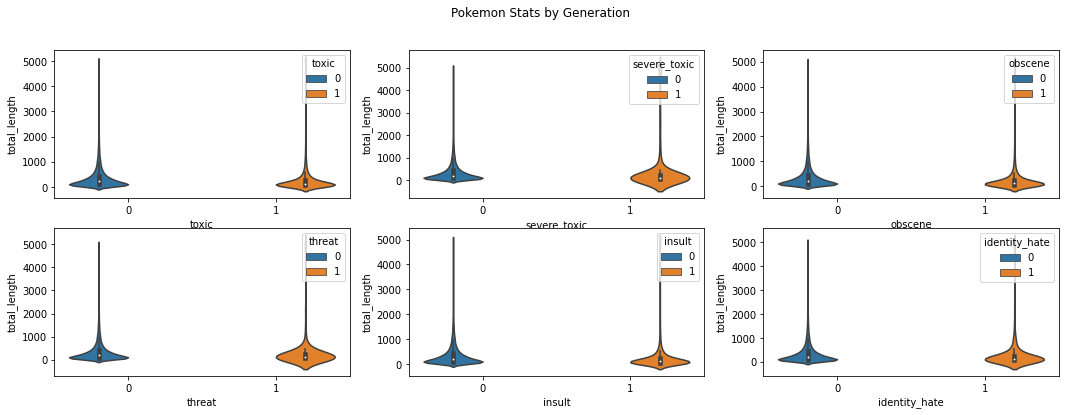

In [ ]:
lst = ['toxic',	'severe_toxic',	'obscene'	,'threat',	'insult',	'identity_hate']
f, axs = plt.subplots(2, 3 ,figsize=(18,6))
f.suptitle('Pokemon Stats by Generation')

sns.violinplot(x=lst[0], y="total_length", data=data , hue = lst[0], ax=axs[0][0])
sns.violinplot(x=lst[1], y="total_length", data=data , hue = lst[1], ax=axs[0][1])
sns.violinplot(x=lst[2], y="total_length", data=data , hue = lst[2], ax=axs[0][2])
sns.violinplot(x=lst[3], y="total_length", data=data , hue = lst[3], ax=axs[1][0])
sns.violinplot(x=lst[4], y="total_length", data=data , hue = lst[4], ax=axs[1][1])
sns.violinplot(x=lst[5], y="total_length", data=data , hue = lst[5], ax=axs[1][2])



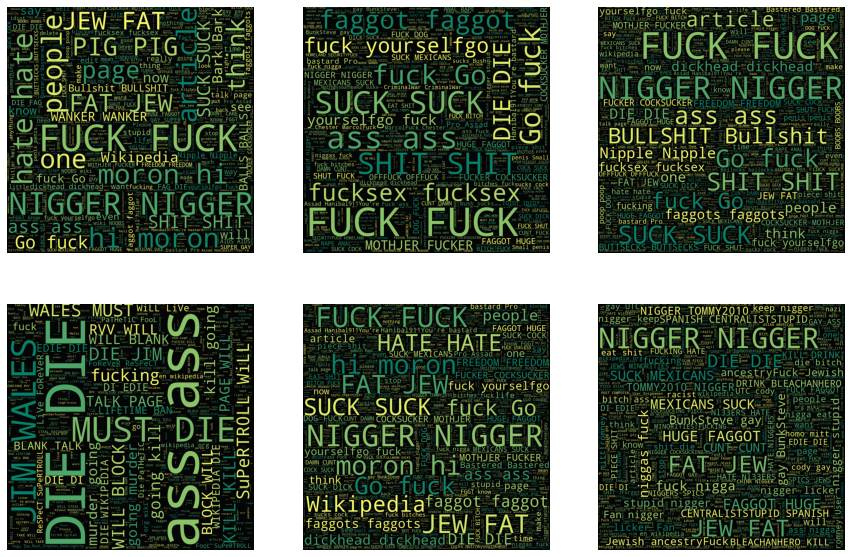

In [ ]:
#https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python
figure, axes = plt.subplots(2, 3, figsize=(15, 10))
types = [['toxic',	'severe_toxic',	'obscene',]	,['threat',	'insult',	'identity_hate']]

for r in range(2):
    for c in range(3):
      toxic_data = data[data[types[r][c]]==1]
      str1 = ''.join(toxic_data['comment_text'])
      wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', max_words=2000,
                stopwords = STOPWORDS).generate(str1) 
  
# plot the WordCloud image
      ax = axes[r][c]                        
      #ax.figure(figsize = (8, 8), facecolor = None)
      ax.imshow(wordcloud.recolor(colormap= 'summer' , random_state=2534), alpha=0.98)
      #plt.imshow(wordcloud) 
      ax.axis("off") 
      #plt.tight_layout(pad = 0)
  
plt.show() 

In [ ]:
clean_data = data[(data["toxic"]==0)&(data["severe_toxic"]==0)&(data["obscene"]==0)&(data["insult"]==0)&(data["threat"]==0)&(data["identity_hate"]==0)]

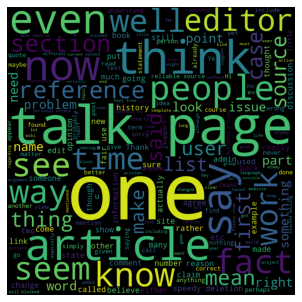

In [ ]:
str1 = ''.join(clean_data['comment_text'])
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = STOPWORDS).generate(str1) 
  
# plot the WordCloud image                        
plt.figure(figsize = (4,4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
def preprocessing(data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sent in tqdm(data['comment_text'].values):
        sent = sent.lower()
        preprocessed_text.append(sent.strip())
    return preprocessed_text

In [ ]:
train['comment_text'] = preprocessing(train)
cv['comment_text'] = preprocessing(cv)
test['comment_text'] = preprocessing(test)

100%|██████████| 153164/153164 [00:00<00:00, 973755.03it/s] 


In [ ]:
train.shape, cv.shape, test.shape

((127656, 8), (31915, 8), (153164, 2))

In [ ]:
!unzip 'gdrive/My Drive/Copy of glove.42B.300d.zip'

Archive:  gdrive/My Drive/Copy of glove.42B.300d.zip
  inflating: glove.42B.300d.txt      


__Making functions:__
1. check_coverage is where text goes through the given vocabulary and tries to find word vectors in your embedding matrix.
2. build_vocab builds a ordered dictionary of words and their frequency in your text corpus.
3. loading glove model

In [ ]:
import operator 

def check_coverage(vocab,embeddings_index):
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in tqdm(vocab):
        try:
            a[word] = embeddings_index[word]
            k += vocab[word]
        except:

            oov[word] = vocab[word]
            i += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key=operator.itemgetter(1))[::-1]

    return sorted_x

In [ ]:
def build_vocab(sentences, verbose =  True):
    """
    :param sentences: list of list of words
    :return: dictionary of words and their count
    """
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

In [ ]:
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        try:
            splitLine = line.split()
            embedding = np.array([float(val) for val in splitLine[1:]])
            model[splitLine[0]] = embedding
        except:
            continue
    print ("Done.",len(model)," words loaded!")
    return model

In [ ]:
model1 = loadGloveModel('glove.42B.300d.txt')

2418it [00:00, 12170.30it/s]

Loading Glove Model


1917495it [02:34, 12417.83it/s]

Done. 1917495  words loaded!


In [ ]:
vocab = build_vocab(list(train['comment_text'].apply(lambda x:x.split())))
oov = check_coverage(vocab,model1)
oov[:10]

100%|██████████| 403716/403716 [00:00<00:00, 776200.43it/s]

Found embeddings for 26.95% of vocab
Found embeddings for  88.43% of all text


[('(utc)', 4640),
 ('article,', 4452),
 ('•', 4308),
 ('page,', 4265),
 ('(talk)', 3393),
 ("isn't", 3232),
 ('also,', 2723),
 ('so,', 2609),
 ('again,', 2588),
 ('wikipedia,', 2455)]

In [ ]:
import string
latin_similar = "’'‘ÆÐƎƏƐƔĲŊŒẞÞǷȜæðǝəɛɣĳŋœĸſßþƿȝĄƁÇĐƊĘĦĮƘŁØƠŞȘŢȚŦŲƯY̨Ƴąɓçđɗęħįƙłøơşșţțŧųưy̨ƴÁÀÂÄǍĂĀÃÅǺĄÆǼǢƁĆĊĈČÇĎḌĐƊÐÉÈĖÊËĚĔĒĘẸƎƏƐĠĜǦĞĢƔáàâäǎăāãåǻąæǽǣɓćċĉčçďḍđɗðéèėêëěĕēęẹǝəɛġĝǧğģɣĤḤĦIÍÌİÎÏǏĬĪĨĮỊĲĴĶƘĹĻŁĽĿʼNŃN̈ŇÑŅŊÓÒÔÖǑŎŌÕŐỌØǾƠŒĥḥħıíìiîïǐĭīĩįịĳĵķƙĸĺļłľŀŉńn̈ňñņŋóòôöǒŏōõőọøǿơœŔŘŖŚŜŠŞȘṢẞŤŢṬŦÞÚÙÛÜǓŬŪŨŰŮŲỤƯẂẀŴẄǷÝỲŶŸȲỸƳŹŻŽẒŕřŗſśŝšşșṣßťţṭŧþúùûüǔŭūũűůųụưẃẁŵẅƿýỳŷÿȳỹƴźżžẓ"
white_list = string.ascii_letters + string.digits + latin_similar + ' '
white_list += "'"

In [ ]:
glove_chars = ''.join([c for c in tqdm(model1) if len(c) == 1])
glove_symbols = ''.join([c for c in glove_chars if not c in white_list])
glove_symbols

100%|██████████| 1917495/1917495 [00:00<00:00, 3521517.09it/s]


',.":)(-!?|;$&/[]>%=#+@~£\\_{}^`<€›½…“”–¢¡¿―¥—‹¼¤¾、»。‟￥«฿ª˚ƒˈˑ⅓˜₤ˆ￡₂˙؟˝⅛„ɡ۞๑⅔ˌﾟ⅜‛܂⁰ở⅝ﬁ̅͡۩αʈ⅞ɪ￦;̣˛٠₃ȃ‚ν۶ǡʿʃ₁βʤ˘٩̵￠в̶ǥλ２δ٤۵ˇ۲́１ー۰ƃɔɑ̂ǀω۱ʡʊ̃日⁴ʒ̳３։μɂ₄θɨｏͧ年ǰφȥ７ɿـγʌǂʻɐﬂǹ̿̊ƥɒиπ４ɹаｓ̏ʔσａｉȡǵはǩ⁵̀ʹ５ᴥ߂˃˹ȣ͂ｗ̄ȭȿｍɤȸсƽ₀ｃạε⁶の๐月̌ɾﾞ̸ʘɸȫ⁸⅕̾₆ｖτʕȯ܀ː΄６ˤǫ๖ｐ̱ͤ١۳̎⁷ɩổ̐̓ρƪ̷ˉʞ₅ɚɯʺɲ\u06ddɻ˂ˡ位ʹʂｂ８ǭ⅙ʧ９ʐｑʋ۴̗̕ʱƶǁ˻̴ｔḳｘǯɵʀȱ号'

___
__Note:__ So lets have closer look on what we just did. We printed all symbols that we have an embedding vector for. Intrestingly its not only a vast amount of punctuation but also emojis and other symbols. Especially when doing sentiment analysis emojis and other symbols carrying sentiments should not be deleted! What we can delete are symbols we have no embeddings for. So lets check the characters in our texts and find those to delete:
___

In [ ]:
jigsaw_chars = build_vocab(list(train["comment_text"]))
jigsaw_symbols = ''.join([c for c in jigsaw_chars if not c in white_list])
jigsaw_symbols

100%|██████████| 127656/127656 [00:04<00:00, 29660.75it/s]


',\n:/.?"-!()—•*=[]@|✍\\_>;+%–&\xa0“”`~{}°χεῖρς★#琉竜·<♫♦♠\uf0a7聖や☼брайенאמר→←≈$^…″✆✈⋅龙α®\u200e☎☘☤ᛏ¢©−¡笑う犬の冒険\u3000（§™ɑ✉球南西►ωηλουνιτδφβγμκσ➨❝❞あっ女神さまそれぞ翼☮´ʘ屌你老母кстовздижящёмлп窣堵坡«└┐\x93\x94†ψ「✎」♥♪➔∇∆雲\u200d水明溪！✔º‽↔₪₩𒁳όπάξ📞📧ίˌɪˈɔːɡ‧\u2002☺☭專科年普通大學制在職班×ựứхъ⨹↑↓іцѕ、🍁µ♣№☏₂»€ʍɐ⇔¦⇒頭ˉ╦╩連絡見学迷惑∙。，：干什么？ζή̇先生┘┌\u2060⊕⊗ύ⁄ツʊɹ⚇♔😜किपलदेव‡эгь😂¿′¬߷♀עשתהדבו世祖ውይትǰʿتوفانॐ☥ычу❤☯ऋ｡◕‿✄\ufeff\u2009ҝार्तθهشکگزجآرد☆✰\x95¤≠∞℥\xadمحّلعبسي‹›步驚心電視劇☠₵₡²±≤₨₳ɖ⊝כ⊙✽आयशीसפלגיצקנחזןסםʞʇªὀὺὸἐ᾽ὄὅἴὰώἱἀἠὲὶῷἔ„महषटṗṫṁ▫धोك龍\uf6fc\uf701ंघṯʾ¯¸¨\u202f\u2003≽ʌⱷ҅ᴥ≼қ野您好歡迎來訪英文版的維基百雖然我們隨時編輯但是這次執筆所使用並未達到需求準若不介意話可以中感謝參加ຄົນລາວຸ່ມແະພງສທອັກິດີຈປຊໄຕຫຼູຣໂໜຮਸੁਖグレン\u200b£∫أخصةقئطىثءغ،ًضظُذإ☸¹ɰɯ♬♩ү☿【遯卋山人】よ独断と偏で選んだ받침ㅅㄷ࿓ї́💬ɿ―ღ田代し波瀾万丈伝কুমিল্াভটোরয়সেজ馬长颈鹿ừế۞ʧѓќђћџшј投稿█▪🗽内ℱюׁʕ对话页会記録メール২০১きなおɳ☝翁ϛ\x97●✓ʉ₦฿₮）张金柱ầ╟─╢⁂ἰ◁ウド６８∪∈∴÷͡ʃʒی臭妈烂ὂ梨酸钾✤ٔ占地☛說嗎㎥市έ\u200aф排便மல்கழிதạệभगडॉजऔअ庄子和蝴蝶∅一擲千उझनुूँ四粿紅龜影武者₭\u202a\u202c🍌王調유헌劉憲太守↗ǖ½吗ˑ健ジョ・ワシト☻ṃử׀\uf0b7ɻ̃ⁿˡソニックザヘホ⚔¶て下い忍ộʁต่อยมวᵗᵃᵏ⁞ễờラヴパ塩谷定たにこ栗林慧くりば渡辺兼わべかねど折原恵はらけ豆१२३४५६७८९■ʨɢ𐌴𐌹𐌲𐌰𐌿ɩȋɱ梁智前永訣界चफ़ण०खबृठैइ😄臼井儀ṛ满清倒退论㊟ậ川河개는때려잡아야맛있다ი

In [ ]:
symbols_to_delete = ''.join([c for c in jigsaw_symbols if not c in glove_symbols])
symbols_to_delete

'\n•*✍\xa0°χῖς★琉竜·♫♦♠\uf0a7聖や☼брйенאמר→←≈″✆✈⋅龙®\u200e☎☘☤ᛏ©−笑う犬冒険\u3000（§™✉球南西►ηουικ➨❝❞あっ女神さまそれぞ翼☮´屌你老母ктозджящёмлп窣堵坡└┐\x93\x94†ψ「✎」♥♪➔∇∆雲\u200d水明溪！✔º‽↔₪₩𒁳όάξ📞📧ί‧\u2002☺☭專科普通大學制在職班×ựứхъ⨹↑↓іцѕ🍁µ♣№☏ʍ⇔¦⇒頭╦╩連絡見学迷惑∙，：干什么？ζή̇先生┘┌\u2060⊕⊗ύ⁄ツ⚇♔😜किपलदेव‡эгь😂′¬߷♀עשתהדבו世祖ውይትتوفانॐ☥ычу❤☯ऋ｡◕‿✄\ufeff\u2009ҝार्तهشکگزجآرد☆✰\x95≠∞℥\xadمحّلعبسي步驚心電視劇☠₵₡²±≤₨₳ɖ⊝כ⊙✽आयशीसפלגיצקנחזןסםʇὀὺὸἐ᾽ὄὅἴὰώἱἀἠὲὶῷἔमहषटṗṫṁ▫धोك龍\uf6fc\uf701ंघṯʾ¯¸¨\u202f\u2003≽ⱷ҅≼қ野您好歡迎來訪英文版的維基百雖然我們隨時編輯但是這次執筆所使用並未達到需求準若不介意話可以中感謝參加ຄົນລາວຸ່ມແະພງສທອັກິດີຈປຊໄຕຫຼູຣໂໜຮਸੁਖグレン\u200b∫أخصةقئطىثءغ،ًضظُذإ☸¹ɰ♬♩ү☿【遯卋山人】よ独断と偏で選んだ받침ㅅㄷ࿓ї💬ღ田代し波瀾万丈伝কুমিল্াভটোরয়সেজ馬长颈鹿ừếѓќђћџшј投稿█▪🗽内ℱюׁ对话页会記録メル২০১きなおɳ☝翁ϛ\x97●✓ʉ₦₮）张金柱ầ╟─╢⁂ἰ◁ウド∪∈∴÷ی臭妈烂ὂ梨酸钾✤ٔ占地☛說嗎㎥市έ\u200aф排便மல்கழிதệभगडॉजऔअ庄子和蝴蝶∅一擲千उझनुूँ四粿紅龜影武者₭\u202a\u202c🍌王調유헌劉憲太守↗ǖ吗健ジョ・ワシト☻ṃử׀\uf0b7ⁿソニックザヘホ⚔¶て下い忍ộʁต่อยมวᵗᵃᵏ⁞ễờラヴパ塩谷定たにこ栗林慧くりば渡辺兼わべかねど折原恵らけ豆१२३४५६७८९■ʨɢ𐌴𐌹𐌲𐌰𐌿ȋɱ梁智前永訣界चफ़ण०खबृठैइ😄臼井儀ṛ满清倒退论㊟ậ川河개는때려잡아야맛있다იხლეთ\x99\u2028△দℳคุก盒▲三國志卷吕布邈陈登臧洪後漢書焉袁術列傳都０ἡ∀《》ロチ😉聯ուրատɦʲɜɘˠʷ̯ɕ😢😃😊³✐�◔国本土ᵀᴬᴸᴷ討論ॆथὼ☽◯☾😀טாைீவுʝფʰპროსავ틀보호문서편집요청

In [ ]:
symbols_to_isolate = ''.join([c for c in jigsaw_symbols if c in glove_symbols])
symbols_to_isolate

',:/.?"-!()—=[]@|\\_>;+%–&“”`~{}ερ#<а$^…α¢¡のɑωλντδφβγμσʘсви«πˌɪˈɔːɡ年、₂»€ɐˉ。ʊɹ¿ǰʿθ¤‹›ʞª„ʌᴥ£ɯ́ɿ―۞ʧʕー฿６８͡ʃʒạ½ˑɻ̃ˡはɩ１ʈɨɤ̴˜ﬂ⁴⁰ɾ月号ƒˤ位日ʻ\u06dd۵۩ǀ¥¾ʀ⅓⅔¼⅛⅜⅝⅞₤ǫʡʔɸʂʐɲʋǂǁɵɚɒﾟﾞ'

In [ ]:
from nltk.tokenize.treebank import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

isolate_dict = {ord(c):f' {c} ' for c in symbols_to_isolate}
remove_dict = {ord(c):f'' for c in symbols_to_delete}

def handle_punctuation(x):
    x = x.translate(remove_dict)
    x = x.translate(isolate_dict)
    x = tokenizer.tokenize(x)
    x = ' '.join(x)
    return x

In [ ]:
train['comment_text'] = train['comment_text'].apply(lambda x:handle_punctuation(x))

In [ ]:
vocab = build_vocab(list(train['comment_text'].apply(lambda x:x.split())),verbose=False)
oov = check_coverage(vocab,model1)
oov[:10]

100%|██████████| 182607/182607 [00:00<00:00, 764882.03it/s]


Found embeddings for 63.73% of vocab
Found embeddings for  98.95% of all text


[('yourselfgo', 622),
 ('f5fffa', 566),
 ('bullshitbullshit', 412),
 ('hanibal911you', 366),
 ('articlemanual', 348),
 ("'image", 333),
 ('deneid', 331),
 ("'fuck", 322),
 ('wikipediahow', 306),
 ('criminalwar', 279)]

In [ ]:
cv['comment_text'] = cv['comment_text'].apply(lambda x:handle_punctuation(x))

In [ ]:
test['comment_text'] = test['comment_text'].apply(lambda x:handle_punctuation(x))

In [ ]:
import pickle

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('gdrive/My Drive/Colab Notebooks/Yagvendra/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:
def w2v(data):
    # average Word2Vec
    # compute average word2vec for each review.
    avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(data['comment_text'].values): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors.append(vector)

    return avg_w2v_vectors

In [ ]:
train_comment = w2v(train)
cv_comment = w2v(cv)
test_comment = w2v(test)

100%|██████████| 153164/153164 [00:11<00:00, 12888.01it/s]


In [ ]:
train_label = train[['toxic',	'severe_toxic',	'obscene',	'threat',	'insult',	'identity_hate']].values
cv_label = cv[['toxic',	'severe_toxic',	'obscene',	'threat',	'insult',	'identity_hate']].values

In [ ]:
train_auc = []
cv_auc = []
hyper_parameter = []
max_depth = [4, 6, 8, 10]
n_estimators = [10, 50, 100, 150]
for i in tqdm(n_estimators):
    for j in max_depth:        
        forest =  RandomForestClassifier(class_weight="balanced", max_depth=j, n_estimators=i)
        multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
        multi_target_forest.fit(train_comment, train_label)
     
        train_pred = multi_target_forest.predict_proba(train_comment)
        train_pred = np.transpose([pred[:, 1] for pred in train_pred])
    
        cv_pred = multi_target_forest.predict_proba(cv_comment)
        cv_pred = np.transpose([pred[:, 1] for pred in cv_pred])
        
        hyper_parameter.append((i,j))
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
        train_auc.append(roc_auc_score(train_label, train_pred, average=None))
        cv_auc.append(roc_auc_score(cv_label, cv_pred, average=None))

100%|██████████| 4/4 [1:12:35<00:00, 1088.94s/it]


In [ ]:
auc_t = []
for i in range(len(train_auc)): 
   auc_t.append(np.average(train_auc[i])) 

In [ ]:
auc_c = []
for i in range(len(cv_auc)):
    auc_c.append(np.average(cv_auc[i]))

In [ ]:
#https://www.geeksforgeeks.org/python-unzip-a-list-of-tuples/
res = list(zip(*hyper_parameter))
a = {'min_sample_split':res[0], 'max_depth':res[1],'Train_auc':auc_t,'CV_auc':auc_c}
df = pd.DataFrame(a)
df

min_sample_split  max_depth  Train_auc    CV_auc
0                 10          4   0.911207  0.897827
1                 10          6   0.935971  0.908398
2                 10          8   0.959688  0.908729
3                 10         10   0.978914  0.905022
4                 50          4   0.919854  0.907362
5                 50          6   0.943567  0.919238
6                 50          8   0.966206  0.925557
7                 50         10   0.984539  0.926668
8                100          4   0.921233  0.908511
9                100          6   0.944404  0.920226
10               100          8   0.966959  0.927497
11               100         10   0.985134  0.930456
12               150          4   0.921748  0.909346
13               150          6   0.944550  0.920531
14               150          8   0.967247  0.928618
15               150         10   0.985545  0.931632

In [ ]:
forest = RandomForestClassifier(random_state=1, class_weight="balanced", max_depth=10, n_estimators=150)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
multi_target_forest.fit(train_comment, train_label)

MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight='balanced',
                                                       criterion='gini',
                                                       max_depth=10,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
              

In [ ]:
pred_train = multi_target_forest.predict_proba(train_comment)
pred_train = np.transpose([pred[:, 1] for pred in pred_train])

In [ ]:
pred_cv = multi_target_forest.predict_proba(cv_comment)
pred_cv = np.transpose([pred[:, 1] for pred in pred_cv])

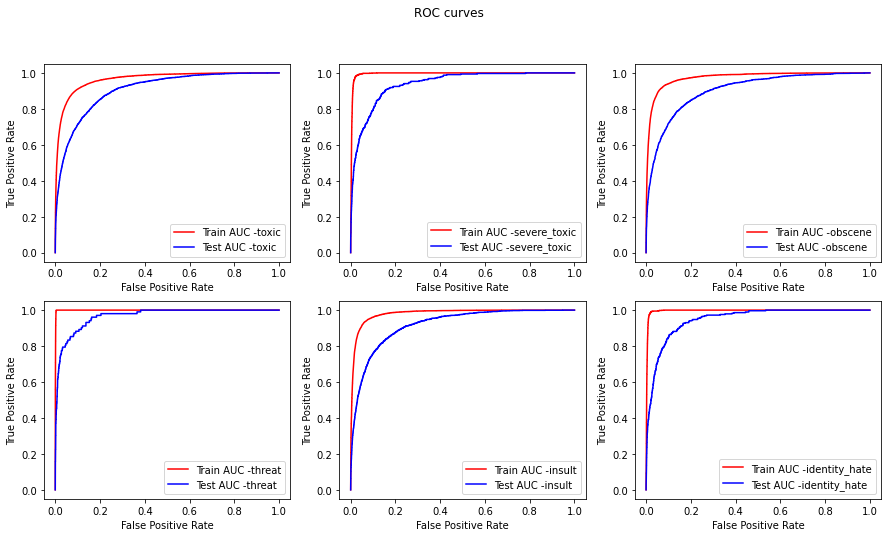

In [ ]:
from sklearn.metrics import roc_curve
lst = ['toxic',	'severe_toxic',	'obscene',	'threat',	'insult',	'identity_hate']

f, ax = plt.subplots(nrows=2, ncols=3)
f.suptitle('ROC curves')

i=0
for row in ax:
    for col in row:
        train_fpr, train_tpr, _ = roc_curve(train_label[:,i], pred_train[:,i])
        cv_fpr, cv_tpr, _ = roc_curve(cv_label[:,i], pred_cv[:,i])

        col.plot(train_fpr, train_tpr, 'r', label='Train AUC -' + str(lst[i]))
        col.plot(cv_fpr, cv_tpr, 'b', label='Test AUC -'  + str(lst[i]))
        col.legend(loc='lower right')
        i+=1

for a in ax.flat:
    a.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

f.set_figheight(8)
f.set_figwidth(15)
plt.show()

In [ ]:
test_label = pd.read_csv("gdrive/My Drive/Colab Notebooks/Yagvendra/test_labels.csv")
test_label.head()

id  toxic  severe_toxic  ...  threat  insult  identity_hate
0  00001cee341fdb12     -1            -1  ...      -1      -1             -1
1  0000247867823ef7     -1            -1  ...      -1      -1             -1
2  00013b17ad220c46     -1            -1  ...      -1      -1             -1
3  00017563c3f7919a     -1            -1  ...      -1      -1             -1
4  00017695ad8997eb     -1            -1  ...      -1      -1             -1

[5 rows x 7 columns]

In [ ]:
pred_test = multi_target_forest.predict_proba(test_comment)
pred_test = np.transpose([pred[:, 1] for pred in pred_test])

sub = pd.DataFrame(pred_test , columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])

sub["id"] = test_label["id"].values
sub.head()

toxic  severe_toxic   obscene  ...    insult  identity_hate                id
0  0.948247      0.828153  0.924351  ...  0.926042       0.934367  00001cee341fdb12
1  0.321069      0.076676  0.298232  ...  0.254867       0.074277  0000247867823ef7
2  0.134900      0.043762  0.153106  ...  0.110038       0.045283  00013b17ad220c46
3  0.150273      0.038963  0.095082  ...  0.089803       0.013430  00017563c3f7919a
4  0.250312      0.053535  0.224104  ...  0.194216       0.055858  00017695ad8997eb

[5 rows x 7 columns]

In [ ]:
result = sub[["id",'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
result.to_csv("gdrive/My Drive/submission.csv" ,index=False)
result.tail()

id     toxic  ...    insult  identity_hate
153159  fffcd0960ee309b5  0.423761  ...  0.245637       0.084929
153160  fffd7a9a6eb32c16  0.501035  ...  0.356332       0.158528
153161  fffda9e8d6fafa9e  0.125717  ...  0.069392       0.025506
153162  fffe8f1340a79fc2  0.127604  ...  0.102384       0.127027
153163  ffffce3fb183ee80  0.713037  ...  0.689144       0.282205

[5 rows x 7 columns]

In [ ]:
translator = Translator()
encode = translator.translate(data.comment_text.values[0] , dest='fr').text
decode = translator.translate(encode , dest='en').text
print(data.comment_text.values[0])
print(decode)

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
Explanation
Why have the changes made under my Hardcore Metallica Fan username been canceled? They were not vandalism, just the closing of some GAs after having voted in the FAC of New York Dolls. And don't delete the template from the talk page, because I'm now retired.


In [ ]:
translator = Translator()

train_es = []
train_de = []
train_fr = []

for i in range(len(data.comment_text.values)):
  encode_es = translator.translate(data.comment_text.values[0] , dest='es').text
  decode_es = translator.translate(encode_es , dest='en').text
  train_es.append(decode_es)

  encode_de = translator.translate(data.comment_text.values[0] , dest='de').text
  decode_de = translator.translate(encode_de , dest='en').text
  train_de.append(decode_de)

  encode_fr = translator.translate(data.comment_text.values[0] , dest='fr').text
  decode_fr = translator.translate(encode_fr , dest='en')
  train_fr.append(decode_fr)

In [ ]:
train_es =  pd.read_csv("/gdrive/My Drive/Colab Notebooks/train_es.csv")
train_de =  pd.read_csv("/gdrive/My Drive/Colab Notebooks/train_de.csv")
train_fr =  pd.read_csv("/gdrive/My Drive/Colab Notebooks/train_fr.csv")
print(len(train_es))
print(len(train_de))
print(len(train_fr))

159571
159571
159571


In [ ]:
new_train =  pd.concat([data ,train_fr  ,train_es ,train_de , test_data_new])
new_train = shuffle(new_train)
print(len(new_train))

In [ ]:
train_comment = new_train["comment_text"].values
cv_comment = test_data_new["comment_text"].values
test_comment  = test_data["comment_text"].values

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [ ]:
padded_ids_train = []
mask_ids_train = []

for i in tqdm(range(len(train_comment))):
  encoding = tokenizer.encode_plus(train_comment[i]  , max_length = 128 , pad_to_max_length = True  ,do_lower_case = False)
  input_ids , attention_id = encoding["input_ids"] , encoding["attention_mask"] 
  #if len(input_ids) < max_len:
    #padded_ = [0]*((max_len) - len(input_ids))
  padded_ids_train.append(input_ids)
  #padded_ids.extend(padded_)
  mask_ids_train.append(attention_id)

100%|██████████| 702262/702262 [12:02<00:00, 971.62it/s] 


In [ ]:
padded_ids_cv = []
mask_ids_cv = []

for i in tqdm(range(len(cv_comment))):
  encoding = tokenizer.encode_plus(cv_comment[i]  , max_length = 128 , pad_to_max_length = True , do_lower_case = False )
  input_ids , attention_id = encoding["input_ids"] , encoding["attention_mask"]
  #if len(input_ids) < max_len:
    #padded_ = [0]*((max_len) - len(input_ids))
  padded_ids_cv.append(input_ids)
  #padded_ids.extend(padded_)
  mask_ids_cv.append(attention_id)

100%|██████████| 63978/63978 [01:08<00:00, 930.74it/s]


In [ ]:
padded_ids_test = []
mask_ids_test = []

for i in tqdm(range(len(test_comment))):
  encoding = tokenizer.encode_plus(test_comment[i]  , max_length = 128 , pad_to_max_length = True , do_lower_case = False )
  input_ids , attention_id = encoding["input_ids"] , encoding["attention_mask"]
  #if len(input_ids) < max_len:
    #padded_ = [0]*((max_len) - len(input_ids))
  padded_ids_test.append(input_ids)
  #padded_ids.extend(padded_)
  mask_ids_test.append(attention_id)

100%|██████████| 153164/153164 [02:37<00:00, 974.24it/s]


In [ ]:
#train_array = np.array(new_df["toxic"].values)
y_train = new_train.drop(["id" ,"comment_text"] , axis=1)

#test_array = np.array(test_data_new["toxic"].values)

In [ ]:
train_id = np.array(padded_ids_train)
train_mask = np.array(mask_ids_train)

test_id = np.array(padded_ids_test)
test_mask = np.array(mask_ids_test)

print(train_id.shape , test_id.shape)
print(train_mask.shape , test_mask.shape)

(702262, 128) (153164, 128)
(702262, 128) (153164, 128)


In [ ]:
input_1 = tf.keras.Input(shape = (128) , dtype=np.int32)

input_2 = tf.keras.Input(shape = (128) , dtype=np.int32)

model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

output  = model([input_1 , input_2] , training = True )

answer = tf.keras.layers.Dense(6 , activation = tf.nn.sigmoid )(output[0])

model = tf.keras.Model(inputs = [input_1, input_2 ] , outputs = [answer])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
tf_bert_for_sequence_classifica ((None, 2),)         109483778   input_3[0][0]                    
                                                                 input_4[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 6)            18          tf_bert_for_sequence_classi

In [ ]:
%load_ext tensorboard

In [ ]:
!rm -rf /gdrive/My Drive/logs/

In [ ]:
log_dir = "/gdrive/My Drive/logs/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
filepath = "/gdrive/My Drive/final_model.h5"
checkpoint = ModelCheckpoint(filepath=filepath,
                                  monitor='val_auc',
                                  verbose=1,
                                  save_best_only=True , mode = "max" , save_weights_only = True)

In [ ]:
#with strategy.scope():
#model = creat_model()
auc_score = AUC(multi_label=True)
model.compile(optimizer = Adam(lr = 3e-5),
                loss = tf.keras.losses.binary_crossentropy,
             metrics = [ auc_score])

In [ ]:
model.fit([train_id , train_mask] , y_train,
          validation_split = 0.1 , batch_size = 32, 
          epochs=3, callbacks = [tensorboard_callback , checkpoint]
)

In [ ]:
model.load_weights("/gdrive/My Drive/final_model.h5")

In [ ]:
a = model.predict([test_id , test_mask])
sub = pd.DataFrame(a , columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])

sub["id"] = test_data["id"].values
sub.head()

toxic  severe_toxic   obscene  ...    insult  identity_hate                id
0  0.996859      0.249085  0.988158  ...  0.978657       0.226216  00001cee341fdb12
1  0.000981      0.000043  0.000692  ...  0.000117       0.000079  0000247867823ef7
2  0.015035      0.000207  0.003353  ...  0.002331       0.000990  00013b17ad220c46
3  0.000158      0.000004  0.000095  ...  0.000013       0.000004  00017563c3f7919a
4  0.000236      0.000008  0.000170  ...  0.000025       0.000007  00017695ad8997eb

[5 rows x 7 columns]

In [ ]:
result = sub[["id",'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
result.to_csv("/gdrive/My Drive/ninth_submission.csv" ,index=False)
result.tail()

id     toxic  ...    insult  identity_hate
153159  fffcd0960ee309b5  0.496643  ...  0.031268       0.001175
153160  fffd7a9a6eb32c16  0.000931  ...  0.000087       0.000072
153161  fffda9e8d6fafa9e  0.000181  ...  0.000012       0.000005
153162  fffe8f1340a79fc2  0.000768  ...  0.000069       0.000082
153163  ffffce3fb183ee80  0.620240  ...  0.113429       0.006729

[5 rows x 7 columns]

In [ ]:
def creat_model():
  
  input_1 = tf.keras.Input(shape = (128) , dtype=np.int32)

  input_2 = tf.keras.Input(shape = (128) , dtype=np.int32)

  model = TFBertModel.from_pretrained('bert-base-uncased')

  output , pooled_out  = model([input_1 , input_2] , training = True )

  x = tf.reshape(pooled_out , (-1 , pooled_out.shape[1]))

  dense_1 = tf.keras.layers.Dense(768   , activation= tf.nn.relu)(x)

  drop_1 = tf.keras.layers.Dropout(0.1)(dense_1)

  answer = tf.keras.layers.Dense(6 , activation = tf.nn.sigmoid)(drop_1)

  model = tf.keras.Model(inputs = [input_1, input_2 ] , outputs = [answer])

  return model

In [ ]:
model = creat_model()
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   ((None, 128, 768), ( 109482240   input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
tf_op_layer_Reshape_1 (TensorFl [(None, 768)]        0           tf_bert_model_1[0][1]      

In [ ]:
log_dir = "/gdrive/My Drive/logs/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
filepath = "/gdrive/My Drive/final_model3.h5"
checkpoint = ModelCheckpoint(filepath=filepath,
                                  monitor='val_auc',
                                  verbose=1,
                                  save_best_only=True , mode = "max" , save_weights_only = True)

In [ ]:
auc_score = AUC(multi_label=True)
model.compile(optimizer = Adam(lr = 3e-5),
                loss = tf.keras.losses.binary_crossentropy,
             metrics = [ auc_score])

In [ ]:
model.fit([train_id , train_mask] , y_train,
          validation_split = 0.1 , batch_size = 32, 
          epochs=3, callbacks = [tensorboard_callback , checkpoint]
)

In [ ]:
b = model.predict([test_id , test_mask])
sub = pd.DataFrame(b , columns=['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
sub["id"] = test_data["id"].values
result = sub[["id",'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']]
result.to_csv("/gdrive/My Drive/13th_submission.csv" ,index=False)

In [ ]:
%tensorboard --logdir "/gdrive/My Drive/logs"

In [ ]:
symbols_to_delete = ''.join([c for c in jigsaw_symbols if not c in glove_symbols])
symbols_to_delete

'\n\xa0·•「」സംവാദമോ്കെടരʍ†‡↔↑↓¶∞₳₵₡₢₫₯₠₣₴₭ℳ₥₦№₧₰៛₨₪৳₮₩♠♣♥♦²³ẽǖǘǚǜ̇ḷḹṃṇṛṝάέήίόύώζηικξοςυχψбгґѓдђеёєжзѕіїйјкќлљмнњопртћуўфхцчџшщъыьэюя̪ɖɟɢɕʑʝʁʜʢɦɱɳɴɰʙɽɫɬɮɺɭʎʟɥɧʄɠʛǃʉʏɘɜɝɞɶʰʷʲˠⁿ−→™☎☓✰*´♫§⋅☼連絡見学迷惑🗽レンジャ竜龙御法度└┐¨יגוּמִצְרַםָלדאֶתעֲנהבפֻח≈ἰ©♪®►内ȋ琉⇔¦⇒✉☿קשזןסכグ☥\u200e°☏☺\u200b❤☮☯😜牛岩ترجمةթարգմնույঅনুবাদ翻译თარგმნიઅનુવાદअनुवाद訳ಅನುವಾದបក្រែ번역ການແປພສभषंतरकणेهமொழிபெயர்ுఅనువాదการแปลׁ״ך曹操‖ⓣ←🍁ʇ✍≡√⊕⊗\u2060聖や\u200a福原信三路草本写真家事典😅⁄（）\u2009ầ\x95ㄏㄨㄤㄉㄧӧṁ🍌会話हि्ीংলͼ✐♬♩☆龍≤♂\u2002⁂≠\u2028★步驚心電視劇∂ᛏ╟─╢雲水∇∆〈ῦ\x93\x94飞天航服सघ×✄是吗？☻คุῶἐῃᾳὶὧ�豆田みせよ松浦靜山う『甲子夜』にえる川柳おそらく人知ず江戸後期平藩主・静が詠んだ句鳴かぬなしてほとぎすựứ\ufeff߷♀҈♨ውይት♑．ｎｌｋ☀୯̮د੭✆☇☄下さい✎¸ºحوياأخفلكنصبزقئشطىثسءعغ،ًضظُذإآ✽\x99╫《》投稿大き世✔ט顧輝仙拉啼笑姻緣穣⚇♔㎥😊●✓\x97四野您好，歡迎來訪英文版的維基百科雖然我們隨時你在編輯但這次執筆所使用並未達到需求準若不介意可以中感謝參加☭･∀पफ़गज➥𒁳肥薩線白石駅付近球磨\u3000熊県葦北郡芦町／村黃巾既故改為｡◕‿華民國於東亞共和洲現有最早實行立憲制成前被廣泛承認代表注今因要土置或政治素而通稱臺灣防部聯合美務院獨體油輸出組織′मट℥☣ὼտی一郎♝♚內地十八省卻只指傳統范圍即包括蒙古西藏青海新疆台\u2004☛◅➔😂순혈주의純血義專普學職班モルットあり谢ᴀ太湖黄窣堵坡庄蝴蝶ღ頭史记姓\u200dऋʨ✈😄➨¬➪˺ム̯ӣ÷ṗ💬ध☠ⅱファソギョ℠∙：¯說嗎▎✿リガラカ첫눈初雪永∅ツ‑ो橘桔了外生－µ¹๛ˁ〈⌊〉☘健桜蘭高校ホスクブץஎஜஆகலைறசவữ≥很\uf0b7𐌴𐌹𐌲𐌰𐌿ὀὺὸ᾽ὄὅἴῖὰἱἀἠὲῷἔ